# Laffer Curves  with Adaptive Expectations 

## Overview

This lecture studies stationary and dynamic **Laffer curves** in the inflation tax rate in a non-linear version of the model studied in this  lecture {doc}`money_inflation`.

As in the lecture {doc}`money_inflation`, this lecture uses the log-linear version of the demand function for money that  {cite}`Cagan` used in his classic paper in place of the linear demand function used in this  lecture {doc}`money_inflation`.

But now, instead of assuming  ''rational expectations'' in the form of ''perfect foresight'',
we'll adopt the ''adaptive expectations'' assumption used by  {cite}`Cagan` and {cite}`Friedman1956`.

This means that instead of assuming that expected inflation $\pi_t^*$ is described by the "perfect foresight" or "rational expectations" hypothesis 

$$
\pi_t^* = p_{t+1} - p_t
$$ 

that we adopted in lectures {doc}`money_inflation` and lectures {doc}`money_inflation_nonlinear`, we'll now assume that $\pi_t^*$ is determined by the adaptive expectations hypothesis described in equation {eq}`eq:adaptex`  reported below. 

We shall discover that changing our hypothesis about expectations formation in this way will change some our findings and leave others intact.  In particular, we shall discover that

* replacing rational expectations with adaptive expectations leaves the two stationary inflation rates unchanged, but that $\ldots$ 
* it reverses the perverse dynamics by making the **lower** stationary inflation rate the one to which the system typically converges
* a more plausible comparative dynamic outcome emerges in which now inflation can be **reduced** by running **lower**  government deficits

These more plausible comparative dynamics underlie the "old time religion" that states that 
"inflation is always and everywhere caused by government deficits".

These issues were studied by {cite}`bruno1990seigniorage`.

Their purpose was to reverse  what they thought were counter intuitive
predictions of their model under rational expectations (i.e., perfect foresight in this context)
by dropping rational expectations and instead assuming that people form  expectations about future inflation rates according to the "adaptive expectations"  scheme {eq}`eq:adaptex` described below.

```{note}
{cite}`sargent1989least`  had studied another way of selecting stationary equilibrium that involved replacing rational expectations with a model of  learning via least squares regression.  
 {cite}`marcet2003recurrent` and  {cite}`sargent2009conquest` extended that work and applied it to study recurrent high-inflation episodes in Latin America.
``` 

## The model

Let  

* $m_t$ be the log of the money supply at the beginning of time $t$
* $p_t$ be the log of the price level at time $t$
* $\pi_t^*$ be the public's expectation of the rate of inflation between $t$ and $t+1$ 
  
The law of motion of the money supply is

$$ 
\exp(m_{t+1}) - \exp(m_t) = g \exp(p_t) 
$$ (eq:ada_msupply)

where $g$ is the part of government expenditures financed by printing money.

Notice that equation {eq}`eq:ada_msupply` implies that

$$
m_{t+1} = \log[ \exp(m_t) + g \exp(p_t)]
$$ (eq:ada_msupply2)

The demand function for money is 

$$
m_{t+1} - p_t = -\alpha \pi_t^* 
$$ (eq:ada_mdemand)

where $\alpha \geq 0$.  

Expectations of inflation are governed by 

$$
\pi_{t}^* = (1-\delta) (p_t - p_{t-1}) + \delta \pi_{t-1}^*
$$ (eq:adaptex)

where $\delta \in (0,1)$

## Computing an equilibrium sequence 

Equation the expressions for $m_{t+1}$ provided  by {eq}`eq:ada_mdemand` and {eq}`eq:ada_msupply2` and use equation {eq}`eq:adaptex` to eliminate $\pi_t^*$ to obtain
the following equation for $p_t$:

$$
\log[ \exp(m_t) + g \exp(p_t)] - p_t = -\alpha [(1-\delta) (p_t - p_{t-1}) + \delta \pi_{t-1}^*]
$$ (eq:pequation)

**Pseudo-code**

Here is the pseudo-code for our algorithm.

Starting at time $0$ with initial conditions $(m_0, \pi_{-1}^*, p_{-1})$, for each $t \geq 0$
deploy the following steps in order:

* solve {eq}`eq:pequation` for $p_t$
* solve equation {eq}`eq:adaptex` for $\pi_t^*$ 
* solve equation {eq}`eq:ada_msupply2` for $m_{t+1}$

This completes the algorithm.


## Claims or conjectures
  
  
It will turn out that 

* if they exist, limiting values $\overline \pi$ and $\overline \mu$ will be equal

* if  limiting values exist, there are two possible limiting values, one high, one low

* unlike the outcome in lecture {doc}`money_inflation_nonlinear`, for almost all initial log price levels and expected inflation rates $p_0, \pi_{t}^*$, the limiting $\overline \pi = \overline \mu$ is  the **lower** steady state  value

* for each of the two possible limiting values $\bar \pi$ ,there is a unique initial log price level $p_0$ that implies that $\pi_t = \mu_t = \bar \mu$ for all  $t \geq 0$

  * this unique initial log price level solves $\log(\exp(m_0) + g \exp(p_0)) - p_0 = - \alpha \bar \pi $
  
  * the preceding equation for $p_0$ comes from $m_1 - p_0 = -  \alpha \bar \pi$

## Limiting values of inflation rate

As in our earlier lecture {doc}`money_inflation_nonlinear`, we can compute the two prospective limiting values for $\bar \pi$ by studying the steady-state Laffer curve.

Thus, in a  **steady state** 

$$
m_{t+1} - m_t = p_{t+1} - p_t =  x \quad \forall t ,
$$

where $x > 0 $ is a common rate of growth of logarithms of the money supply and price level.

A few lines of algebra yields the following equation that $x$ satisfies

$$
\exp(-\alpha x) - \exp(-(1 + \alpha) x) = g 
$$ (eq:ada_steadypi)

where we require that

$$
g \leq \max_{x: x \geq 0} \exp(-\alpha x) - \exp(-(1 + \alpha) x) ,  
$$ (eq:ada_revmax)

so that it is feasible to finance $g$ by printing money.

The left side of {eq}`eq:ada_steadypi` is steady state revenue raised by printing money.

The right side of {eq}`eq:ada_steadypi` is the quantity  of time $t$ goods  that the government raises by printing money. 

Soon  we'll plot  the left and right sides of equation {eq}`eq:ada_steadypi`.

But first we'll write code that computes a steady-state
$\bar \pi$.

Let's start by importing some  libraries

In [1]:
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.cm import get_cmap
from matplotlib.colors import to_rgba
import matplotlib
from scipy.optimize import root, fsolve

Let's create a `namedtuple` to store the parameters of the model

In [2]:
LafferAdaptive = namedtuple('LafferAdaptive', 
                        ["m0",  # log of the money supply at t=0
                         "α",   # sensitivity of money demand
                         "g",   # government expenditure
                         "δ"])

# Create a Cagan Laffer model
def create_model(α=0.5, m0=np.log(100), g=0.35, δ=0.9):
    return LafferAdaptive(α=α, m0=m0, g=g, δ=δ)

model = create_model()

Now we write code that computes steady-state $\bar \pi$s.

In [3]:
# Define formula for π_bar
def solve_π(x, α, g):
    return np.exp(-α * x) - np.exp(-(1 + α) * x) - g

def solve_π_bar(model, x0):
    π_bar = fsolve(solve_π, x0=x0, xtol=1e-10, args=(model.α, model.g))[0]
    return π_bar

# Solve for the two steady state of π
π_l = solve_π_bar(model, x0=0.6)
π_u = solve_π_bar(model, x0=3.0)
print(f'The two steady state of π are: {π_l, π_u}')

The two steady state of π are: (0.6737147075333032, 1.6930797322614812)


We find two steady state $\bar \pi$ values

## Steady-state Laffer curve

The following figure plots the steady-state Laffer curve together with the two stationary inflation rates.

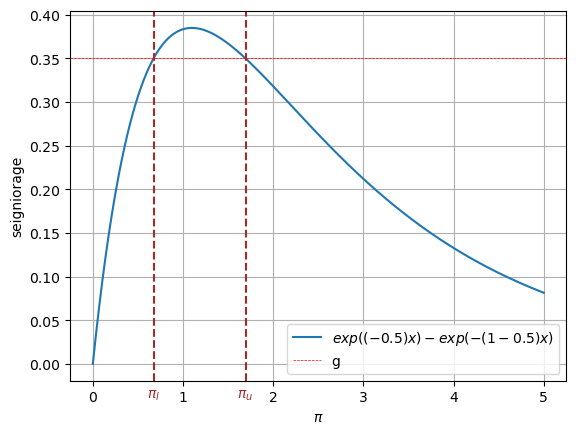

In [4]:
def compute_seign(x, α):
    return np.exp(-α * x) - np.exp(-(1 + α) * x) 

def plot_laffer(model, πs):
    α, g = model.α, model.g
    
    # Generate π values
    x_values = np.linspace(0, 5, 1000)

    # Compute corresponding seigniorage values for the function
    y_values = compute_seign(x_values, α)

    # Plot the function
    plt.plot(x_values, y_values, 
            label=f'$exp((-{α})x) - exp(- (1- {α}) x)$')
    for π, label in zip(πs, ['$\pi_l$', '$\pi_u$']):
        plt.text(π, plt.gca().get_ylim()[0]*2, 
                 label, horizontalalignment='center',
                 color='brown', size=10)
        plt.axvline(π, color='brown', linestyle='--')
    plt.axhline(g, color='red', linewidth=0.5, 
                linestyle='--', label='g')
    plt.xlabel('$\pi$')
    plt.ylabel('seigniorage')
    plt.legend()
    plt.grid(True)
    plt.show()

# Steady state Laffer curve
plot_laffer(model, (π_l, π_u))

## Associated initial price levels

Now that we have our hands on the two possible steady states, we can compute two initial log price levels $p_{-1}$, which as initial conditions, imply that $\pi_t = \bar \pi $ for all $t \geq 0$.

In particular, to initiate a fixed point of the dynamic Laffer curve dynamics, we set 

$$
p_{-1} = m_0 + \alpha \pi^*
$$

In [5]:
def solve_p_init(model, π_star):
    m0, α = model.m0, model.α
    return m0 + α*π_star


# Compute two initial price levels associated with π_l and π_u
p_l, p_u = map(lambda π: solve_p_init(model, π), (π_l, π_u))
print('Associated initial p_{-1}s', f'are: {p_l, p_u}')

Associated initial p_{-1}s are: (4.9420275397547435, 5.451710052118832)


### Verification 

To start, let's write some code to verify that if we initial  $\pi_{-1}^*,p_{-1}$ appropriately, the inflation rate $\pi_t$ will be constant for all $t \geq 0$ (at either $\pi_u$ or $\pi_l$ depending on the initial condition)

The following code verifies this.

In [6]:
def solve_laffer_adapt(p_init, π_init, model, num_steps):
    m0, α, δ, g = model.m0, model.α, model.δ, model.g
    
    m_seq = np.nan * np.ones(num_steps+1) 
    π_seq = np.nan * np.ones(num_steps) 
    p_seq = np.nan * np.ones(num_steps)
    μ_seq = np.nan * np.ones(num_steps) 
    
    m_seq[1] = m0
    π_seq[0] = π_init
    p_seq[0] = p_init
        
    for t in range(1, num_steps):
        # Solve p_t
        def p_t(pt):
            return np.log(np.exp(m_seq[t]) + g * np.exp(pt)) \
                          - pt + α * ((1-δ)*(pt - p_seq[t-1]) + δ*π_seq[t-1])
        
        p_seq[t] = root(fun=p_t, x0=p_seq[t-1]).x[0]
        
        # Solve π_t
        π_seq[t] = (1-δ) * (p_seq[t]-p_seq[t-1]) + δ*π_seq[t-1]
        
        # Solve m_t
        m_seq[t+1] = np.log(np.exp(m_seq[t]) + g*np.exp(p_seq[t]))
        
        # Solve μ_t
        μ_seq[t] = m_seq[t+1] - m_seq[t]
    
    return π_seq, μ_seq, m_seq, p_seq

Compute limiting values starting from $p_{-1}$ associated with $\pi_l$

In [7]:
π_seq, μ_seq, m_seq, p_seq = solve_laffer_adapt(p_l, π_l, model, 50)

# Check steady state m_{t+1} - m_t and p_{t+1} - p_t 
print('m_{t+1} - m_t:', m_seq[-1] - m_seq[-2])
print('p_{t+1} - p_t:', p_seq[-1] - p_seq[-2])

# Check if exp(-αx) - exp(-(1 + α)x) = g
eq_g = lambda x: np.exp(-model.α * x) - np.exp(-(1 + model.α) * x)

print('eq_g == g:', np.isclose(eq_g(m_seq[-1] - m_seq[-2]), model.g))

m_{t+1} - m_t: 0.6737147075332999
p_{t+1} - p_t: 0.6737147075332928
eq_g == g: True


Compute limiting values starting from $p_{-1}$ associated with $\pi_u$

In [8]:
π_seq, μ_seq, m_seq, p_seq = solve_laffer_adapt(p_u, π_u, model, 50)

# Check steady state m_{t+1} - m_t and p_{t+1} - p_t 
print('m_{t+1} - m_t:', m_seq[-1] - m_seq[-2])
print('p_{t+1} - p_t:', p_seq[-1] - p_seq[-2])

# Check if exp(-αx) - exp(-(1 + α)x) = g
eq_g = lambda x: np.exp(-model.α * x) - np.exp(-(1 + model.α) * x)

print('eq_g == g:', np.isclose(eq_g(m_seq[-1] - m_seq[-2]), model.g))

m_{t+1} - m_t: 1.69307973225105
p_{t+1} - p_t: 1.6930797322506947
eq_g == g: True


## Slippery side of Laffer curve dynamics

We are now equipped  to compute  time series starting from different $p_{-1}, \pi_{-1}^*$ settings, analogous to those in this lecture  {doc}`money_inflation` and this lecture  {doc}`money_inflation_nonlinear`. 

Now we'll study how outcomes unfold when we start $p_{-1}, \pi_{-1}^*$ away from a stationary point of the dynamic Laffer curve, i.e., away from either $\pi_u$ or $ \pi_l$.

To construct a perturbation pair $\check p_{-1}, \check \pi_{-1}^*$we'll implement the following pseudo code:

* set $\check \pi_{-1}^* $ not equal to one of the stationary points $\pi_u$ or $ \pi_l$.
* set $\check p_{-1} = m_0 + \alpha \check \pi_{-1}^*$

In [9]:
def draw_iterations(π0s, model, line_params, π_bars, num_steps):
    fig, axes = plt.subplots(4, 1, figsize=(8, 12), sharex=True)

    for ax in axes[:2]:
        ax.set_yscale('log')
        
    for i, π0 in enumerate(π0s):
        p0 = model.m0 + model.α*π0
        π_seq, μ_seq, m_seq, p_seq = solve_laffer_adapt(p0, π0, model, num_steps)

        axes[0].plot(np.arange(num_steps), m_seq[1:], **line_params)
        axes[1].plot(np.arange(-1, num_steps-1), p_seq, **line_params)
        axes[2].plot(np.arange(-1, num_steps-1), π_seq, **line_params)
        axes[3].plot(np.arange(num_steps), μ_seq, **line_params)
            
    axes[2].axhline(y=π_bars[0], color='grey', linestyle='--', lw=1.5, alpha=0.6)
    axes[2].axhline(y=π_bars[1], color='grey', linestyle='--', lw=1.5, alpha=0.6)
    axes[2].text(num_steps * 1.07, π_bars[0], '$\pi_l$', verticalalignment='center', 
                     color='grey', size=10)
    axes[2].text(num_steps * 1.07, π_bars[1], '$\pi_u$', verticalalignment='center', 
                         color='grey', size=10)

    axes[0].set_ylabel('$m_t$')
    axes[1].set_ylabel('$p_t$')
    axes[2].set_ylabel('$\pi_t$')
    axes[3].set_ylabel('$\mu_t$')
    axes[3].set_xlabel('timestep')
    axes[3].xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

Let's simulate the result generated by varying the initial $\pi_{-1}$ and corresponding $p_{-1}$

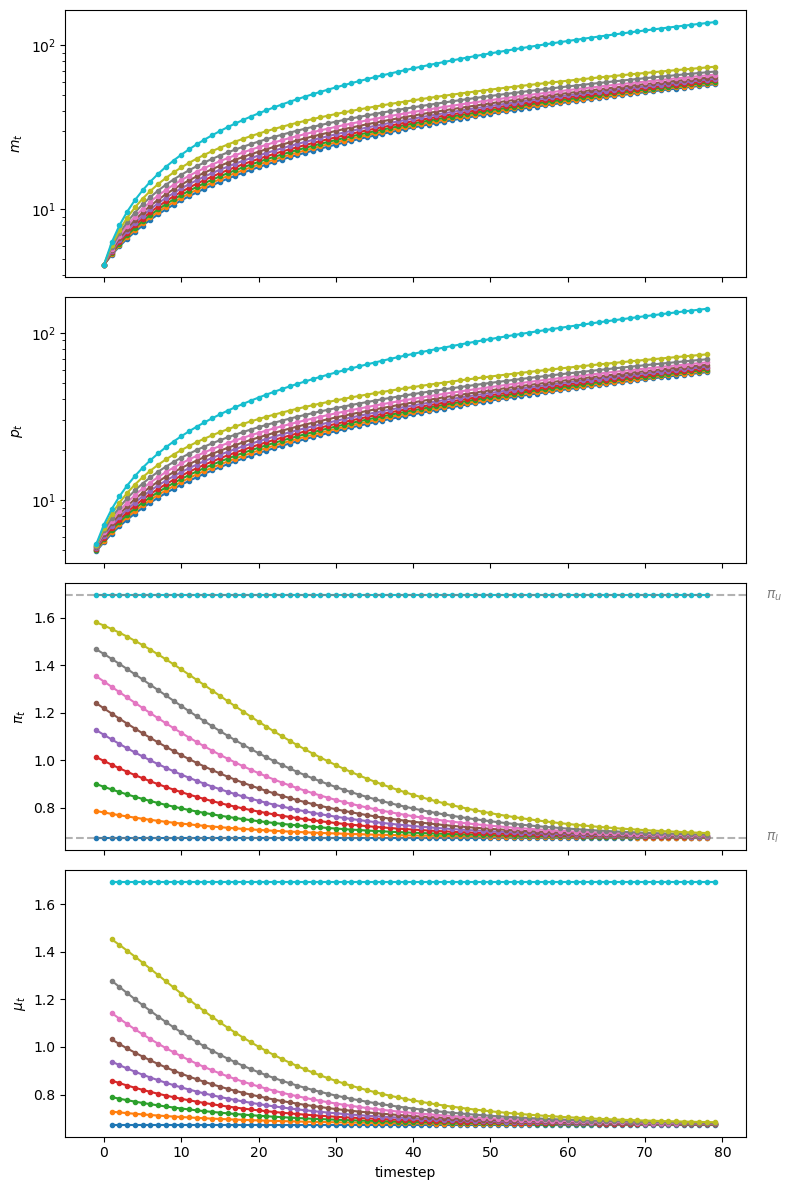

In [10]:
πs = np.linspace(π_l, π_u, 10)

line_params = {'lw': 1.5, 
              'marker': 'o',
              'markersize': 3}
              
π_bars = (π_l, π_u)
draw_iterations(πs, model, line_params, π_bars, num_steps=80)